In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [ ]:
Exercise Steps
1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.
In your quest, you might need to ask a bunch of other questions, such as:
● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities?  
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask? 

In [4]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


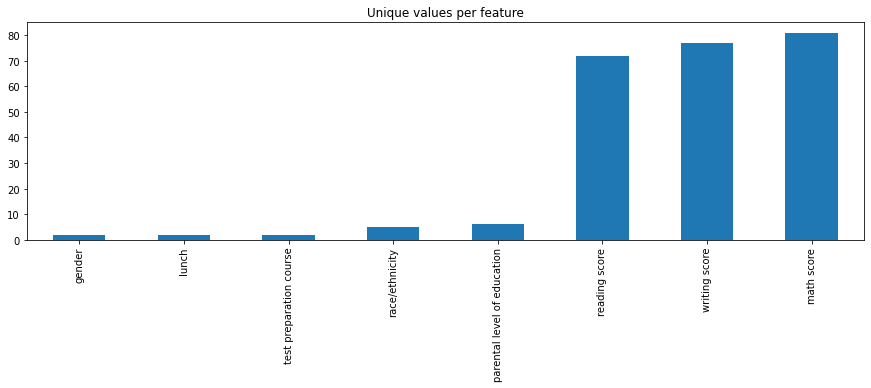

In [9]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [11]:
## get more detail on categorical features 

df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']].nunique()



gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [ ]:
put cdf of the three here 

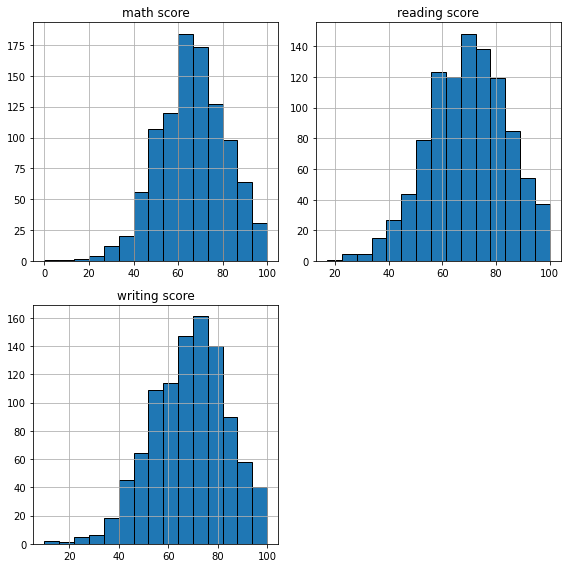

In [16]:
# Plots the histogram for each numerical feature in a separate subplot

df.hist(bins=15, edgecolor="black",figsize=(8,8))
plt.tight_layout();


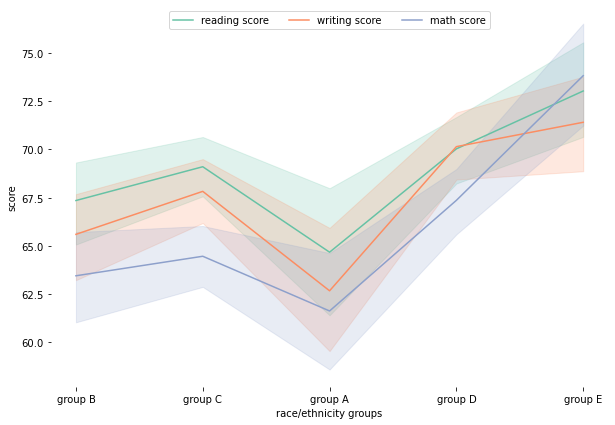

In [25]:
df1 = df[['race/ethnicity','reading score', 'math score', 'writing score']]
df1 = df1.set_index('race/ethnicity')
df2 = df1.cumsum(axis=1)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
f, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x = df1.index, y = df1['reading score'] , label='reading score',   color=sns.color_palette("Set2", 10)[0])
sns.lineplot(x = df1.index, y = df1['writing score' ], label='writing score',   color=sns.color_palette("Set2", 10)[1])
sns.lineplot(x = df1.index, y = df1['math score'], label='math score',   color=sns.color_palette("Set2", 10)[2])

plt.ylabel("score")
plt.xlabel('race/ethnicity groups')
ax.legend(ncol=5, loc="upper center", frameon=True)
sns.despine(left=True, bottom=True)

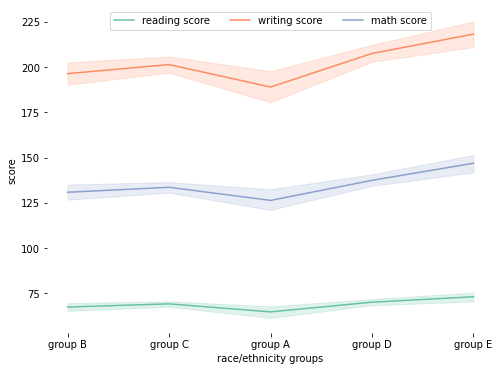

In [26]:
f, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x = df2.index, y = df2['reading score'] , label='reading score',   color=sns.color_palette("Set2", 10)[0])
sns.lineplot(x = df2.index, y = df2['writing score' ], label='writing score',   color=sns.color_palette("Set2", 10)[1])
sns.lineplot(x = df2.index, y = df2['math score'], label='math score',   color=sns.color_palette("Set2", 10)[2])

plt.ylabel("score")
plt.xlabel('race/ethnicity groups')
ax.legend(ncol=5, loc="upper center", frameon=True)
sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='total_score', ylabel='parental level of education'>

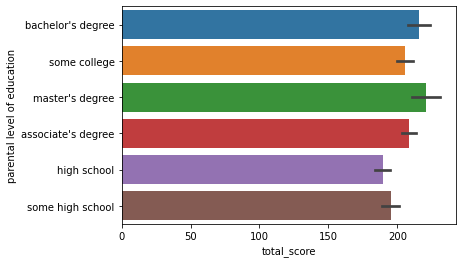

In [28]:
df['total_score'] = sum([df['math score'], df['reading score'], df['writing score']])

sns.barplot(x=df['total_score'], y=df['parental level of education'])

/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


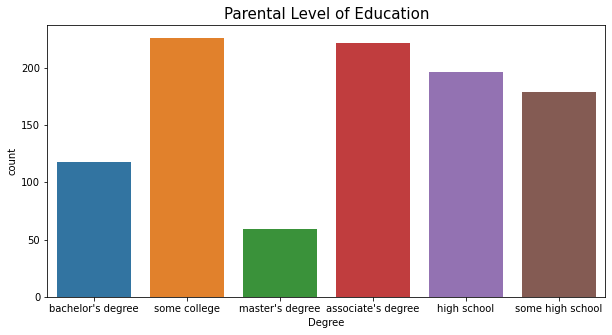

In [29]:
plt.subplots(figsize=(10,5))
sns.countplot(df['parental level of education'])
plt.xlabel('Degree')
plt.title(label = 'Parental Level of Education', fontsize=15,)
plt.show()

In [34]:
df.groupby('parental level of education')['total_score'].mean().sort_values(ascending = True)

parental level of education
high school           189.290816
some high school      195.324022
some college          205.429204
associate's degree    208.707207
bachelor's degree     215.771186
master's degree       220.796610
Name: total_score, dtype: float64

In [64]:
## map categorical variables for numerical value correlation heat map 

df['lunch'] = df['lunch'].map({'free/reduced': 1, 'standard' : 2})
df['gender'] = df['gender'].map({'male': 1, 'female':2})
df['parental level of education'] = df['parental level of education'].map({
                                    'high school': 1, 'some high school': 2,
                                    'some college': 3, "associate's degree": 4,
                                    "bachelor's degree": 5, "master's degree": 6})
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 1, 'group B': 2,
                                                'group C': 3, 'group D': 4,
                                                'group E': 5})

df['test preparation course'] = df['test preparation course'].replace(['none','completed'],[1,2])
# df['test preparation course'] = df['test preparation course'].fillna(value=2).astype('int64')
df[:3]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,5,2,1,72,72,74
1,2,3,3,2,2,69,90,88
2,2,2,6,2,1,90,95,93


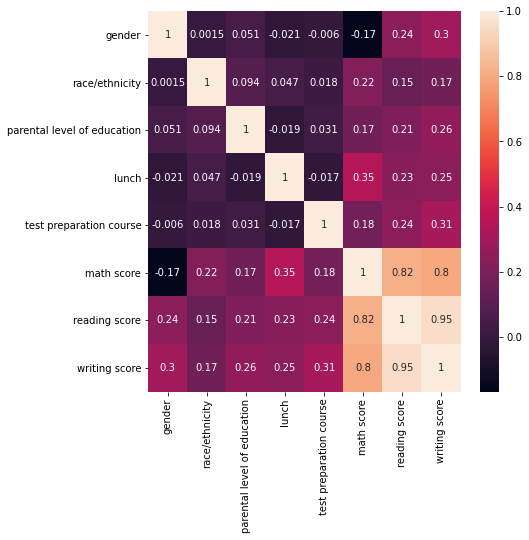

In [65]:
plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()